In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import spacy
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

LOADING OF DATASET

In [37]:
# Load dataset
df = pd.read_csv(r"C:\Users\hp\Downloads\fakenewsdataset.csv")

BASIC INFORMATION OF DATASET

In [38]:
df.shape

(44954, 5)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44954 entries, 0 to 44953
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44902 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44884 non-null  object
 4   level    44954 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


In [40]:
df.head()

,title,text,subject,date,level
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,12/31/2017,0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,12/31/2017,0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,12/30/2017,0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,12/29/2017,0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,12/25/2017,0


In [41]:
df.columns

Index(['title', 'text', 'subject', 'date', 'level'], dtype='object')

CHECK THE DATA IS BALANCED OR NOT

In [42]:
df['level'].value_counts()

level
0    23537
1    21417
Name: count, dtype: int64

In [43]:
level_counts = df['level'].value_counts()

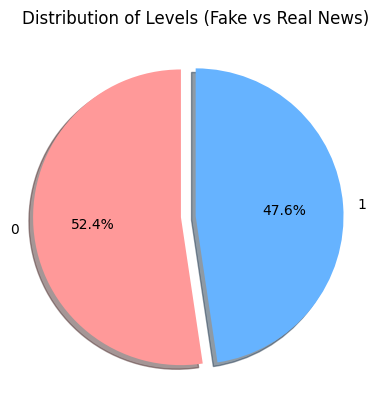

In [44]:
plt.pie(level_counts, labels=level_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999', '#66b3ff'], explode=(0.1, 0), shadow=True)
plt.title('Distribution of Levels (Fake vs Real News)')
plt.show()

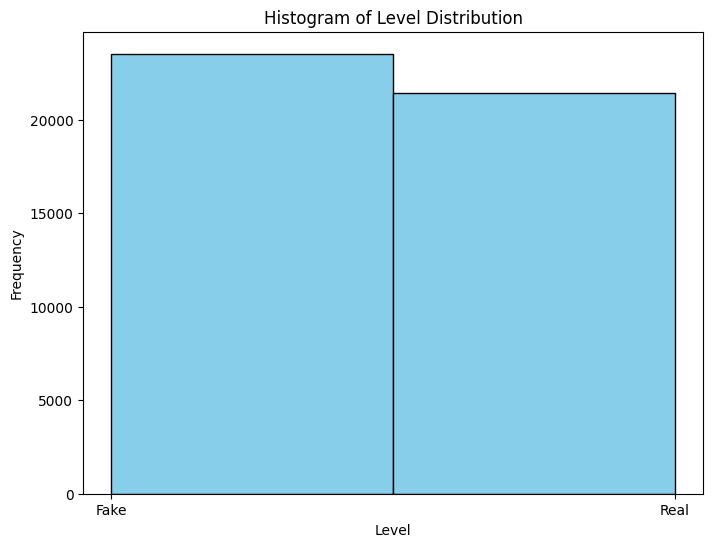

In [45]:
plt.figure(figsize=(8, 6))
plt.hist(df['level'], bins=2, color='skyblue', edgecolor='black')
plt.title('Histogram of Level Distribution')
plt.xlabel('Level')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['Fake', 'Real'])
plt.show()

SO THE DATA IS BALANCED

REMOVE THE DUPLICATE ROWS 

In [46]:
df.shape

(44954, 5)

In [47]:
# Remove duplicates based on the 'text' column 
df_cleaned = df.drop_duplicates(subset=['text'])
#reset the index after dropping duplicates
df_cleaned = df_cleaned.reset_index(drop=True)

In [48]:
df_cleaned.shape

(38647, 5)

In [49]:
df_cleaned

,title,text,subject,date,level
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,12/31/2017,0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,12/31/2017,0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,12/30/2017,0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,12/29/2017,0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,12/25/2017,0
...,...,...,...,...,...
38642,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,8/22/2017,1
38643,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,8/22/2017,1
38644,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,8/22/2017,1
38645,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,8/22/2017,1


FINDING AND REMOVING THE MISSING VALUES

In [50]:
df_cleaned.isnull().sum()

title       1
text        1
subject     1
date       11
level       0
dtype: int64

In [51]:
df_cleaned.isnull().sum().sum()

14

In [52]:
df_cleaned = df_cleaned.dropna()

In [53]:
df_cleaned.isnull().sum().sum()

0

In [54]:
df_cleaned.shape


(38636, 5)

In [55]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38636 entries, 0 to 38646
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    38636 non-null  object
 1   text     38636 non-null  object
 2   subject  38636 non-null  object
 3   date     38636 non-null  object
 4   level    38636 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.8+ MB


PREPROCESSING

Convert Text to Lowercase

In [80]:
df_cleaned.loc[:,'clean_text']=df_cleaned['text'].str.lower()
df_cleaned

,title,text,subject,date,level,clean_text,tokens
0,Donald Trump Sends Out Embarrassing New Year’...,donald trump wish americans happy new year lea...,News,12/31/2017,0.0,donald trump wish americans happy new year lea...,"[donald, trump, wish, americans, happy, new, y..."
1,Drunk Bragging Trump Staffer Started Russian ...,house intelligence committee chairman devin nu...,News,12/31/2017,0.0,house intelligence committee chairman devin nu...,"[house, intelligence, committee, chairman, dev..."
2,Sheriff David Clarke Becomes An Internet Joke...,friday revealed former milwaukee sheriff david...,News,12/30/2017,0.0,friday revealed former milwaukee sheriff david...,"[friday, revealed, former, milwaukee, sheriff,..."
3,Trump Is So Obsessed He Even Has Obama’s Name...,christmas day donald trump announced would bac...,News,12/29/2017,0.0,christmas day donald trump announced would bac...,"[christmas, day, donald, trump, announced, wou..."
4,Pope Francis Just Called Out Donald Trump Dur...,pope francis used annual christmas day message...,News,12/25/2017,0.0,pope francis used annual christmas day message...,"[pope, francis, used, annual, christmas, day, ..."
...,...,...,...,...,...,...,...
38643,LexisNexis withdrew two products from Chinese ...,london reuters lexisnexis provider legal regul...,worldnews,8/22/2017,1.0,london reuters lexisnexis provider legal regul...,"[london, reuters, lexisnexis, provider, legal,..."
38644,Minsk cultural hub becomes haven from authorities,minsk reuters shadow disused sovietera factori...,worldnews,8/22/2017,1.0,minsk reuters shadow disused sovietera factori...,"[minsk, reuters, shadow, disused, sovietera, f..."
38645,Vatican upbeat on possibility of Pope Francis ...,moscow reuters vatican secretary state cardina...,worldnews,8/22/2017,1.0,moscow reuters vatican secretary state cardina...,"[moscow, reuters, vatican, secretary, state, c..."
38646,Indonesia to buy $1.14 billion worth of Russia...,jakarta reuters indonesia buy 11 sukhoi fighte...,worldnews,8/22/2017,1.0,jakarta reuters indonesia buy 11 sukhoi fighte...,"[jakarta, reuters, indonesia, buy, 11, sukhoi,..."


Remove Special Characters and Punctuation 

In [79]:
df_cleaned.loc[:,'text'] = df_cleaned['text'].apply(lambda text: re.sub(r'[^A-Za-z0-9\s]', '', text) if isinstance(text, str) else text)
df_cleaned


,title,text,subject,date,level,clean_text,tokens
0,Donald Trump Sends Out Embarrassing New Year’...,donald trump wish americans happy new year lea...,News,12/31/2017,0.0,donald trump just couldn t wish all americans ...,"[donald, trump, wish, americans, happy, new, y..."
1,Drunk Bragging Trump Staffer Started Russian ...,house intelligence committee chairman devin nu...,News,12/31/2017,0.0,house intelligence committee chairman devin nu...,"[house, intelligence, committee, chairman, dev..."
2,Sheriff David Clarke Becomes An Internet Joke...,friday revealed former milwaukee sheriff david...,News,12/30/2017,0.0,"on friday, it was revealed that former milwauk...","[friday, revealed, former, milwaukee, sheriff,..."
3,Trump Is So Obsessed He Even Has Obama’s Name...,christmas day donald trump announced would bac...,News,12/29/2017,0.0,"on christmas day, donald trump announced that ...","[christmas, day, donald, trump, announced, wou..."
4,Pope Francis Just Called Out Donald Trump Dur...,pope francis used annual christmas day message...,News,12/25/2017,0.0,pope francis used his annual christmas day mes...,"[pope, francis, used, annual, christmas, day, ..."
...,...,...,...,...,...,...,...
38643,LexisNexis withdrew two products from Chinese ...,london reuters lexisnexis provider legal regul...,worldnews,8/22/2017,1.0,"london (reuters) - lexisnexis, a provider of l...","[london, reuters, lexisnexis, provider, legal,..."
38644,Minsk cultural hub becomes haven from authorities,minsk reuters shadow disused sovietera factori...,worldnews,8/22/2017,1.0,minsk (reuters) - in the shadow of disused sov...,"[minsk, reuters, shadow, disused, sovietera, f..."
38645,Vatican upbeat on possibility of Pope Francis ...,moscow reuters vatican secretary state cardina...,worldnews,8/22/2017,1.0,moscow (reuters) - vatican secretary of state ...,"[moscow, reuters, vatican, secretary, state, c..."
38646,Indonesia to buy $1.14 billion worth of Russia...,jakarta reuters indonesia buy 11 sukhoi fighte...,worldnews,8/22/2017,1.0,jakarta (reuters) - indonesia will buy 11 sukh...,"[jakarta, reuters, indonesia, buy, 11, sukhoi,..."


Tokenization

In [77]:
def tokenize_text(text):
    if isinstance(text, str):
        return word_tokenize(text)  # Tokenize the text
    return [] 

# Apply the function to tokenize the 'text_column'
df_cleaned.loc[:,'tokens'] = df_cleaned['text'].apply(tokenize_text)

# Display the DataFrame to see the changes
df_cleaned

,title,text,subject,date,level,clean_text,tokens
0,Donald Trump Sends Out Embarrassing New Year’...,donald trump wish americans happy new year lea...,News,12/31/2017,0.0,donald trump just couldn t wish all americans ...,"[donald, trump, wish, americans, happy, new, y..."
1,Drunk Bragging Trump Staffer Started Russian ...,house intelligence committee chairman devin nu...,News,12/31/2017,0.0,house intelligence committee chairman devin nu...,"[house, intelligence, committee, chairman, dev..."
2,Sheriff David Clarke Becomes An Internet Joke...,friday revealed former milwaukee sheriff david...,News,12/30/2017,0.0,"on friday, it was revealed that former milwauk...","[friday, revealed, former, milwaukee, sheriff,..."
3,Trump Is So Obsessed He Even Has Obama’s Name...,christmas day donald trump announced would bac...,News,12/29/2017,0.0,"on christmas day, donald trump announced that ...","[christmas, day, donald, trump, announced, wou..."
4,Pope Francis Just Called Out Donald Trump Dur...,pope francis used annual christmas day message...,News,12/25/2017,0.0,pope francis used his annual christmas day mes...,"[pope, francis, used, annual, christmas, day, ..."
...,...,...,...,...,...,...,...
38643,LexisNexis withdrew two products from Chinese ...,london reuters lexisnexis provider legal regul...,worldnews,8/22/2017,1.0,"london (reuters) - lexisnexis, a provider of l...","[london, reuters, lexisnexis, provider, legal,..."
38644,Minsk cultural hub becomes haven from authorities,minsk reuters shadow disused sovietera factori...,worldnews,8/22/2017,1.0,minsk (reuters) - in the shadow of disused sov...,"[minsk, reuters, shadow, disused, sovietera, f..."
38645,Vatican upbeat on possibility of Pope Francis ...,moscow reuters vatican secretary state cardina...,worldnews,8/22/2017,1.0,moscow (reuters) - vatican secretary of state ...,"[moscow, reuters, vatican, secretary, state, c..."
38646,Indonesia to buy $1.14 billion worth of Russia...,jakarta reuters indonesia buy 11 sukhoi fighte...,worldnews,8/22/2017,1.0,jakarta (reuters) - indonesia will buy 11 sukh...,"[jakarta, reuters, indonesia, buy, 11, sukhoi,..."


Remove Stopwords 

In [78]:
stop_words = set(stopwords.words('english'))

# Function to remove stopwords
def remove_stopwords(text):
    if isinstance(text, str):
        words = text.split()  # Split the text into words
        filtered_words = [word for word in words if word not in stop_words]  # Remove stopwords
        return ' '.join(filtered_words)  # Join the words back into a single string
    return text  

# Apply the function to remove stopwords from 'text'
df_cleaned.loc[:,'text'] = df_cleaned['text'].apply(remove_stopwords)

# Display the DataFrame to see the changes
df_cleaned

,title,text,subject,date,level,clean_text,tokens
0,Donald Trump Sends Out Embarrassing New Year’...,donald trump wish americans happy new year lea...,News,12/31/2017,0.0,donald trump just couldn t wish all americans ...,"[donald, trump, wish, americans, happy, new, y..."
1,Drunk Bragging Trump Staffer Started Russian ...,house intelligence committee chairman devin nu...,News,12/31/2017,0.0,house intelligence committee chairman devin nu...,"[house, intelligence, committee, chairman, dev..."
2,Sheriff David Clarke Becomes An Internet Joke...,friday revealed former milwaukee sheriff david...,News,12/30/2017,0.0,"on friday, it was revealed that former milwauk...","[friday, revealed, former, milwaukee, sheriff,..."
3,Trump Is So Obsessed He Even Has Obama’s Name...,christmas day donald trump announced would bac...,News,12/29/2017,0.0,"on christmas day, donald trump announced that ...","[christmas, day, donald, trump, announced, wou..."
4,Pope Francis Just Called Out Donald Trump Dur...,pope francis used annual christmas day message...,News,12/25/2017,0.0,pope francis used his annual christmas day mes...,"[pope, francis, used, annual, christmas, day, ..."
...,...,...,...,...,...,...,...
38643,LexisNexis withdrew two products from Chinese ...,london reuters lexisnexis provider legal regul...,worldnews,8/22/2017,1.0,"london (reuters) - lexisnexis, a provider of l...","[london, reuters, lexisnexis, provider, legal,..."
38644,Minsk cultural hub becomes haven from authorities,minsk reuters shadow disused sovietera factori...,worldnews,8/22/2017,1.0,minsk (reuters) - in the shadow of disused sov...,"[minsk, reuters, shadow, disused, sovietera, f..."
38645,Vatican upbeat on possibility of Pope Francis ...,moscow reuters vatican secretary state cardina...,worldnews,8/22/2017,1.0,moscow (reuters) - vatican secretary of state ...,"[moscow, reuters, vatican, secretary, state, c..."
38646,Indonesia to buy $1.14 billion worth of Russia...,jakarta reuters indonesia buy 11 sukhoi fighte...,worldnews,8/22/2017,1.0,jakarta (reuters) - indonesia will buy 11 sukh...,"[jakarta, reuters, indonesia, buy, 11, sukhoi,..."


stemming and lemmatization